In [1]:
from cytomine import Cytomine
import cytomine.models
import time
import shapely
import numpy as np
# import matplotlib
# matplotlib.use('Agg')
# import matplotlib.pyplot as plt
import pylab as plt

import openslide as ops
from fig2img import fig2img,SaveFigureAsImage
from Histupload import HistUpload

#Replace XXX values by your values
# the web url of cytomine instance, always without the  protocol
# your public & private keys of your account on Cytomine (can be found on your Account details on Cytomine)
protocol = 'http://'
cytomine_core_path="robbin.eecs.qmul.ac.uk"
cytomine_public_key="2f4648cb-a3bb-4d0a-9d98-bfcf1d8e2854"
cytomine_private_key="8a6c2440-0964-4948-9bad-4c9dd5d1edf6"


test_histo = HistUpload()


# check connection to the Cytomine instance
core_conn = Cytomine(cytomine_core_path,cytomine_public_key,cytomine_private_key, verbose= False)
# check that the storage exists
tproject = core_conn.get_projects().data()  # Targeted_project_id = 28282


project_id = 28282
test_instance = core_conn.get_project_image_instances(project_id)

tonto = core_conn.get_terms(id_ontology=27995)
terms_dict = {}
for tterm in tonto.data():
    terms_dict[tterm.id] = tterm.name

    
image_index = 0
timage = test_instance[image_index]
image_id = timage.id
tannotations = core_conn.get_annotations(id_project=project_id,id_image=image_id)



#anno_index = 0

tannos = tannotations.data()

print "working on %s"%timage.fullPath+'number of annotaions in%'%len(tannos)

for anno_index in range(len(tannos)):
    
    tanno_id = tannos[anno_index].id
    #print tanno_id
    tannotation = core_conn.get_annotation(id_annotation=tanno_id)
    tlocation = tannotation.location


    g1 = shapely.wkt.loads(tlocation)
    polygons =[g1]
    int_coords = lambda x: np.array(x).round().astype(np.int32)
    exteriors = [int_coords(poly.exterior.coords) for poly in polygons]
    interiors = [int_coords(pi.coords) for poly in polygons
                 for pi in poly.interiors]

    sx,sy,w,h = exteriors[0][:,0].min(),exteriors[0][:,1].max(),exteriors[0][:,0].max()-exteriors[0][:,0].min(),exteriors[0][:,1].max()-exteriors[0][:,1].min(),

    wsi = ops.open_slide(timage.fullPath.replace('DATA_CYTO','usbflash'))
    
  
    
    wx,wy = wsi.dimensions


    if w*h >10000*10000:
        level = 2
    elif w*h >3000*3000:
        level = 1
    else:
        level = 0

    ttimage = wsi.read_region((sx,wy-sy),level,(w/(2**level),h/(2**level)))

    #sx,sy,w,h =(xx.min(),yy.max(),xx.max()-xx.min(),yy.max()-yy.min())

    fig = plt.figure()
    plt.imshow(ttimage)
    plt.plot( (exteriors[0][:,0]-sx)/(2**level),(sy-exteriors[0][:,1])/(2**level),'y-',linewidth =5)
    for tinter_index in range(len(interiors)):
        plt.plot((interiors[tinter_index][:,0]-sx)/(2**level),(sy-interiors[tinter_index][:,1])/(2**level),'y-',linewidth =5)

    plt.axis('off')
    #plt.title('%d-%d-%d'%(project_id,image_id,tanno_id))
    #print(terms_dict[tannos[0].term[0]])

    img = fig2img(fig)
    image_path = '/tmp/%d-%d-%d.png'%(project_id,image_id,tanno_id)
    img.save(image_path)
    #SaveFigureAsImage(fileName=image_path,fig=fig)
    

    test_histo.Upload(image_path=image_path,\
                      subfolder=terms_dict[tannos[anno_index].term[0]],\
                      comment=u'robbin.eecs.qmul.ac.uk/#tabs-image-%d-%d-%d'%(project_id,image_id,tanno_id))




working on /mnt/DATA_CYTO/cyto_data/images/15039//1537718118801/TEOUBKKQBTGYL/CRC_LN_SU_2016_051.mrxs
1270611
1270168
1269910
1269265
1268958
1268503
1268012
1266681
1241324
1241307
1241167
1241141
1241125
1241082
1240962
1240924
1240830
1240808
1240776
1240740
1240721


/home/john/miniconda2/lib/python2.7/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


1240287
1240189
1240137
1240117
1240097
1240079
1240045
1239660
1239175
1238970
1238798
1238738
1238708
1238379
1238037


In [1]:
from cytomine import Cytomine
import cytomine.models
import time
import shapely
import numpy as np
import pylab as plt
import openslide as ops
from fig2img import fig2img
from Histupload import HistUpload

#Replace XXX values by your values
# the web url of cytomine instance, always without the  protocol
# your public & private keys of your account on Cytomine (can be found on your Account details on Cytomine)
protocol = 'http://'
cytomine_core_path="robbin.eecs.qmul.ac.uk"
cytomine_public_key="2f4648cb-a3bb-4d0a-9d98-bfcf1d8e2854"
cytomine_private_key="8a6c2440-0964-4948-9bad-4c9dd5d1edf6"

# check connection to the Cytomine instance
core_conn = Cytomine(cytomine_core_path,cytomine_public_key,cytomine_private_key, verbose= False)
# check that the storage exists

In [2]:
tproject = core_conn.get_projects().data()  # Targeted_project_id = 28282

In [3]:
project_id = 28282
test_instance = core_conn.get_project_image_instances(project_id)

tonto = core_conn.get_terms(id_ontology=27995)
terms_dict = {}
for tterm in tonto.data():
    terms_dict[tterm.id] = tterm.name
    
image_index = 0
timage = test_instance[image_index]
image_id = timage.id
tannotations = core_conn.get_annotations(id_project=project_id,id_image=image_id)

In [4]:
anno_index = 1
tannos = tannotations.data()
tanno_id = tannos[anno_index].id
tannotation = core_conn.get_annotation(id_annotation=tanno_id)
tlocation = tannotation.location

In [5]:

g1 = shapely.wkt.loads(tlocation)
polygons =[g1]
int_coords = lambda x: np.array(x).round().astype(np.int32)
exteriors = [int_coords(poly.exterior.coords) for poly in polygons]
interiors = [int_coords(pi.coords) for poly in polygons
             for pi in poly.interiors]

sx,sy,w,h = exteriors[0][:,0].min(),exteriors[0][:,1].max(),exteriors[0][:,0].max()-exteriors[0][:,0].min(),exteriors[0][:,1].max()-exteriors[0][:,1].min(),

CRC


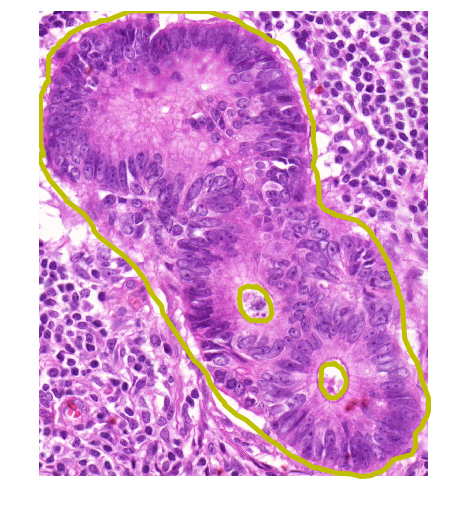

In [6]:
wsi = ops.open_slide(timage.fullPath.replace('DATA_CYTO','usbflash'))
wx,wy = wsi.dimensions


if w*h >10000*10000:
    level = 2
elif w*h >3000*3000:
    level = 1
else:
    level = 0


ttimage = wsi.read_region((sx,wy-sy),level,(w/(2**level),h/(2**level)))

#sx,sy,w,h =(xx.min(),yy.max(),xx.max()-xx.min(),yy.max()-yy.min())

fig = plt.figure(figsize=[9,9])
plt.imshow(ttimage)
plt.plot( (exteriors[0][:,0]-sx)/(2**level),(sy-exteriors[0][:,1])/(2**level),'y-',linewidth =5)
for tinter_index in range(len(interiors)):
    plt.plot((interiors[tinter_index][:,0]-sx)/(2**level),(sy-interiors[tinter_index][:,1])/(2**level),'y-',linewidth =5)

plt.axis('off')
#plt.title('%d-%d-%d'%(project_id,image_id,tanno_id))
print(terms_dict[tannos[0].term[0]])

In [13]:
img = fig2img(fig)
img.save('/tmp/%d-%d-%d.png'%(project_id,image_id,tanno_id))

In [28]:
ls /tmp/*.png

ls: cannot access '/tmp/*.png': No such file or directory


In [14]:

test_histo = HistUpload()

test_histo.Upload(image_path='/tmp/28282-1107082-1270168.png',subfolder='CRC',comment=u'robbin.eecs.qmul.ac.uk/#tabs-image-28282-1107082-1270168')

In [15]:
test_histo.Check_exist(image_path='/tmp/28282-1107082-1270168.png',subfolder='CRC')

True

In [18]:
print(test_histo.webfdlist['LYMPH_NODE_METASTASES_V2 / CRC'])
webimlist = test_histo.mysite.pwg.categories.getImages(cat_id=5672,per_page=500,page=0)

webimlist['images'][0]['name'],webimlist['images'][0]['id'],

5672


(u'28282-1107082-1270168', 99922)

In [24]:
int(webimlist['paging']['count'])/500

0

In [29]:
def SaveFigureAsImage(fileName,fig=None,**kwargs):
    ''' Save a Matplotlib figure as an image without borders or frames.
       Args:
            fileName (str): String that ends in .png etc.

            fig (Matplotlib figure instance): figure you want to save as the image
        Keyword Args:
            orig_size (tuple): width, height of the original image used to maintain 
            aspect ratio.
    '''
    fig_size = fig.get_size_inches()
    w,h = fig_size[0], fig_size[1]
    fig.patch.set_alpha(0)
    if kwargs.has_key('orig_size'): # Aspect ratio scaling if required
        w,h = kwargs['orig_size']
        w2,h2 = fig_size[0],fig_size[1]
        fig.set_size_inches([(w2/w)*w,(w2/w)*h])
        fig.set_dpi((w2/w)*fig.get_dpi())
    a=fig.gca()
    a.set_frame_on(False)
    a.set_xticks([]); a.set_yticks([])
    plt.axis('off')
    plt.xlim(0,h); plt.ylim(w,0)
    fig.savefig(fileName, transparent=True,bbox_inches='tight', pad_inches=0)


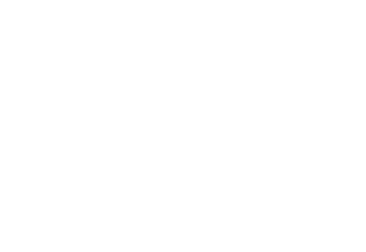

In [31]:
SaveFigureAsImage(fig=fig,fileName='/tmp/28282-1107082-1270169.png')

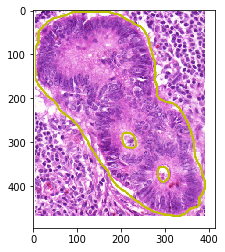

In [33]:
plt.imshow(plt.imread('/tmp/28282-1107082-1270169.png'))

In [34]:
ls /tmp/*.png

/tmp/28282-1107082-1270169.png
